# import libraries

In [6]:
%matplotlib inline

import boto3
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

# import data from AWS

In [8]:
client = boto3.client('iotanalytics', 'eu-central-1')
data = client.get_dataset_content(datasetName= 'air_data_analysis_dataset')
df = pd.read_csv(data["entries"][0]["dataURI"])
df = df[df["timestamp"] >= "2021-05-27T00:00:00"]
df = df[df["timestamp"] < "2021-06-01T00:00:00"]
df.drop("__dt", axis = 1, inplace = True)
df.set_index("timestamp", inplace = True)
df=df.sort_index()
df.head()

,humidity,temperature,carbon_dioxide
timestamp,,,
2021-05-27T07:22:34,53,20,702
2021-05-27T07:27:35,57,20,598
2021-05-27T07:32:37,52,20,766
2021-05-27T07:37:38,51,20,594
2021-05-27T07:42:40,52,21,621


<AxesSubplot:xlabel='timestamp'>

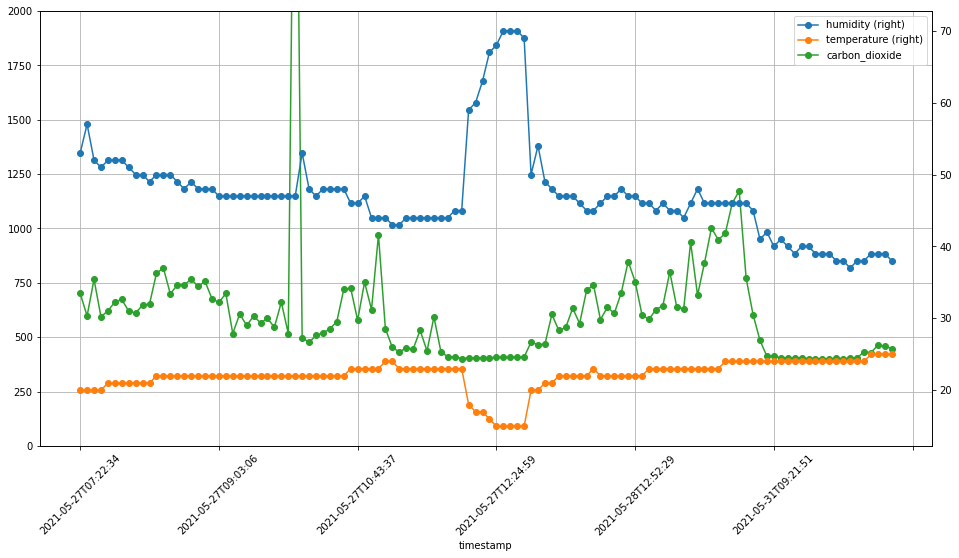

In [9]:
df.plot(use_index=True, secondary_y= ["humidity","temperature"], figsize = (16,8), marker = "o", ylim=(0,2000), rot=45, grid = True)

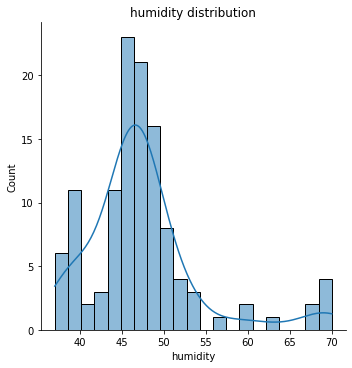

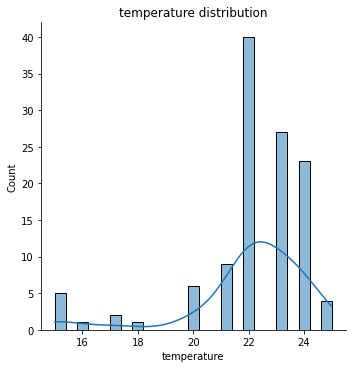

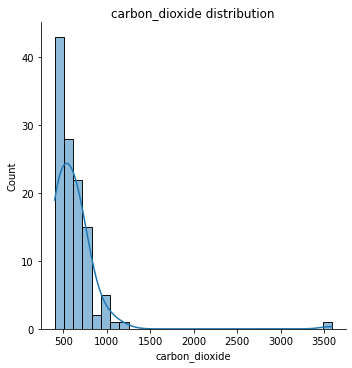

In [10]:
# from scipy.stats import shapiro
for column in df.columns:

    sns.displot(x=column, data=df, kde=True).set(title=(str(column)+ " distribution"))
